# Libraries

In [ ]:
# tensorflof and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam

# helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

## Open zip

In [ ]:
# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [ ]:
# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

In [ ]:
# unzipping the contents
!unzip animal_data/train_beg.zip
!unzip animal_data/test_beg.zip

Archive:  animal_data/train_beg.zip
replace train_beg/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_

**Note :**
Load training and testing dataset animals

In [ ]:
train_animals = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
test_animals = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv", header = None, names = ['filename'])

In [ ]:
train_animals.head()

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [ ]:
train_animals['animal_type'].value_counts()

mucca     600
pecora    600
Name: animal_type, dtype: int64

## Load and view sample

### Display an Image

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
%matplotlib inline

Class:  mucca
Size:  (300, 200)


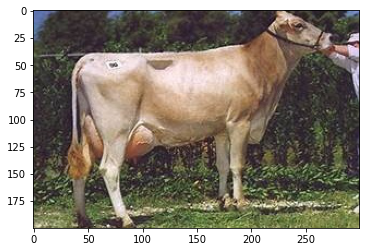

In [ ]:
image_pos = 120 # image's number that you want to show
name_image, class_image = train_animals.loc[image_pos,'filename'], train_animals.loc[image_pos,'animal_type']
img = load_img('train_beg/' + name_image) # show image
plt.imshow(img)
print("Class: ", class_image)
print("Size: ",img.size)

# Preprocessing

## We store X data

In [ ]:
imgs_array = []
for index,animal in train_animals.iterrows():
  img_temp = load_img('train_beg/' + animal['filename']) # load img
  array_temp = img_to_array(img_temp) # img to array
  #flatten_array = array_temp.flatten() # flatten array
  imgs_array.append(array_temp) # push the flatten array


X = np.array(imgs_array)

In [ ]:
X

array([[[[205., 205., 207.],
         [205., 205., 207.],
         [205., 205., 207.],
         ...,
         [205., 203., 204.],
         [205., 203., 204.],
         [206., 204., 205.]],

        [[203., 203., 205.],
         [203., 203., 205.],
         [204., 204., 206.],
         ...,
         [204., 202., 203.],
         [206., 204., 205.],
         [207., 205., 206.]],

        [[205., 205., 207.],
         [204., 204., 206.],
         [203., 203., 205.],
         ...,
         [205., 203., 204.],
         [207., 205., 206.],
         [209., 207., 208.]],

        ...,

        [[246., 253., 246.],
         [251., 255., 247.],
         [250., 253., 234.],
         ...,
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.]],

        [[242., 249., 241.],
         [249., 255., 245.],
         [249., 252., 231.],
         ...,
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.]],

        [[244., 251., 244.],
       

## Encode and stote the label

In [ ]:
# encode and store the label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_animals['animal_class'] = le.fit_transform(train_animals['animal_type'])
y = train_animals.animal_class

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1195    1
1196    1
1197    1
1198    1
1199    1
Name: animal_class, Length: 1200, dtype: int64

## Split data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print("Length Train Data: %i"%(len(X_train)))

Length Train Data: 960


## We scale data

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Load test data

In [ ]:
test_imgs_array = []
for index,animal in test_animals.iterrows():
  img_temp = load_img('test_beg/' + animal['filename']) # load img
  array_temp = img_to_array(img_temp) # img to array
  #flatten_array = array_temp.flatten() # flatten array
  test_imgs_array.append(array_temp) # push the flatten array


test_data = np.array(test_imgs_array)
test_data_scaled = test_data/255 # scaling

## Set constants that I will use later

In [ ]:
# Set constants that I will use later
batch_size = 32
num_classes = 2
epochs = 20
input_shape = (200, 300, 3)

# Building CNN Model

## Define the model

In [ ]:
# Model 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Compile the model

In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 35, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 103040)           

## Fit the model

In [ ]:
# Fit the model
model.fit(X_train,
          y_train, 
          epochs = epochs, 
          batch_size = batch_size,
          validation_data = (X_test, y_test))

Epoch 1/20
30/30 [==============================] - 91s 3s/step - loss: 697.9468 - accuracy: 0.5604 - val_loss: 1.2554 - val_accuracy: 0.5625
Epoch 2/20
30/30 [==============================] - 91s 3s/step - loss: 20.2157 - accuracy: 0.6615 - val_loss: 0.7638 - val_accuracy: 0.5250
Epoch 3/20
30/30 [==============================] - 91s 3s/step - loss: 0.4396 - accuracy: 0.7906 - val_loss: 2.5617 - val_accuracy: 0.5208
Epoch 4/20
30/30 [==============================] - 91s 3s/step - loss: 37.2311 - accuracy: 0.6125 - val_loss: 11.1767 - val_accuracy: 0.5083
Epoch 5/20
30/30 [==============================] - 91s 3s/step - loss: 1.7699 - accuracy: 0.7385 - val_loss: 0.8237 - val_accuracy: 0.6583
Epoch 6/20
30/30 [==============================] - 90s 3s/step - loss: 17.1753 - accuracy: 0.6479 - val_loss: 0.8900 - val_accuracy: 0.6458
Epoch 7/20
30/30 [==============================] - 90s 3s/step - loss: 4.7042 - accuracy: 0.6729 - val_loss: 0.7824 - val_accuracy: 0.6333
Epoch 8/20
30/

In [ ]:
model.evaluate(X_test_scaled, y_test)

8/8 [==============================] - 5s 671ms/step - loss: 0.6776 - accuracy: 0.5500


[0.6775816082954407, 0.550000011920929]

**conclution :**
**Accuracy Test** : 55% \ **Accuracy Train**: 99%\ The model overfit the data a lot, too bad. We can add some strategies to fight against that (Dropout)

## Improved CNN

Improve de CNN, adding:
- Convolutional Layer
- Dense hidden Layer
- Dropout (0.3)

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,
          y_train, 
          epochs = epochs, 
          batch_size = batch_size,
          validation_data = (X_test, y_test))

Epoch 1/20
30/30 [==============================] - 90s 3s/step - loss: 69.4137 - accuracy: 0.5573 - val_loss: 1.9131 - val_accuracy: 0.5083
Epoch 2/20
30/30 [==============================] - 90s 3s/step - loss: 2.4180 - accuracy: 0.5344 - val_loss: 0.6665 - val_accuracy: 0.5167
Epoch 3/20
30/30 [==============================] - 90s 3s/step - loss: 0.8238 - accuracy: 0.5823 - val_loss: 0.6776 - val_accuracy: 0.5875
Epoch 4/20
30/30 [==============================] - 90s 3s/step - loss: 1.6634 - accuracy: 0.5594 - val_loss: 0.6738 - val_accuracy: 0.5250
Epoch 5/20
30/30 [==============================] - 91s 3s/step - loss: 0.9660 - accuracy: 0.6302 - val_loss: 0.6614 - val_accuracy: 0.5292
Epoch 6/20
30/30 [==============================] - 90s 3s/step - loss: 1.0256 - accuracy: 0.6260 - val_loss: 0.6819 - val_accuracy: 0.5792
Epoch 7/20
30/30 [==============================] - 90s 3s/step - loss: 0.6687 - accuracy: 0.6469 - val_loss: 0.5569 - val_accuracy: 0.7083
Epoch 8/20
30/30 [=

In [ ]:
model.evaluate(X_test_scaled, y_test)

8/8 [==============================] - 6s 693ms/step - loss: 0.6955 - accuracy: 0.4917


[0.6955376863479614, 0.49166667461395264]

**Conclusions:**
**Accuracy Test :** 73% \ **Accuracy Train:** 95%\ The model have less overfit, we can do it better! Let's try data augmentation

## Data Augmentation
To combat overfitting, we need more training data, for this i will try data Augmentation

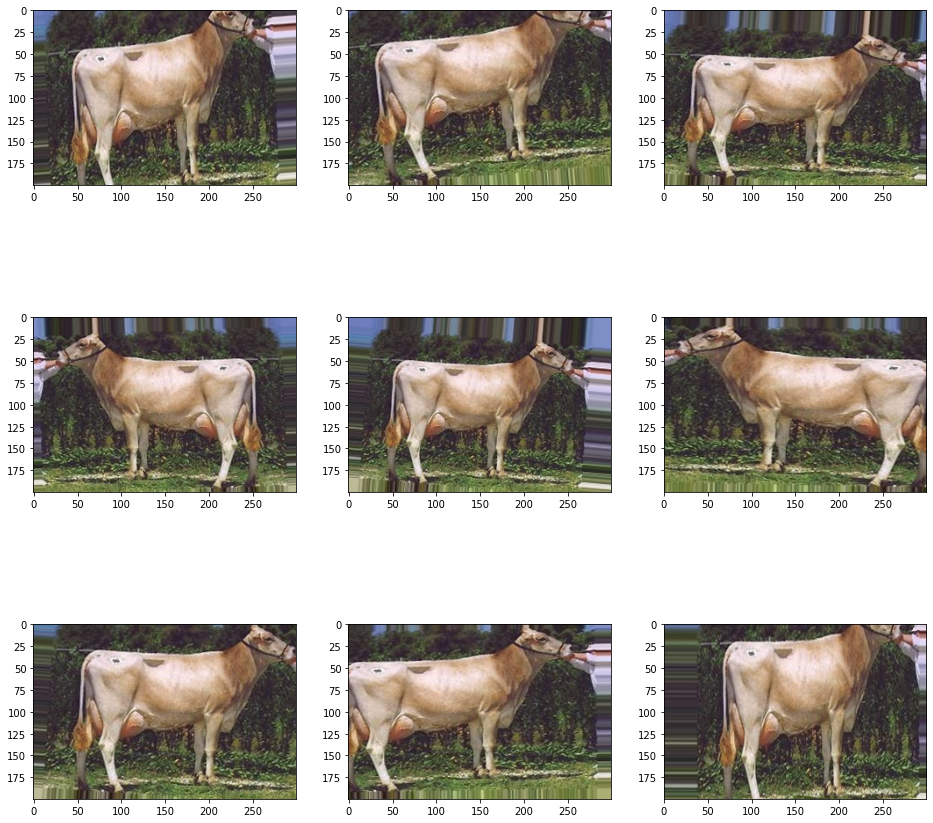

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
example_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, rotation_range=5,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

samples = expand_dims(img_to_array(img), 0)
it = example_datagen.flow(samples, batch_size=1)

f, axs = plt.subplots(3,3,figsize=(16,16))
# generate samples and plot
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('float32')
  # plot raw pixel data
  plt.imshow(image)

# show the figure
plt.show()

In [ ]:
# We generate train data augmented. The validation data only will be rescaled.
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, rotation_range=5,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
# train with data augmentation
model.fit(train_datagen.flow(X_train, y_train, batch_size=40), 
          epochs = 100, 
          steps_per_epoch= 24,
          validation_data = val_datagen.flow(X_test, y_test, batch_size = 25),
          validation_steps = 6
          )

Epoch 1/100
24/24 [==============================] - 99s 4s/step - loss: 0.7030 - accuracy: 0.5063 - val_loss: 0.6879 - val_accuracy: 0.5200
Epoch 2/100
24/24 [==============================] - 100s 4s/step - loss: 0.6856 - accuracy: 0.5396 - val_loss: 0.6763 - val_accuracy: 0.6333
Epoch 3/100
24/24 [==============================] - 100s 4s/step - loss: 0.6771 - accuracy: 0.5750 - val_loss: 0.6614 - val_accuracy: 0.6333
Epoch 4/100
24/24 [==============================] - 99s 4s/step - loss: 0.6655 - accuracy: 0.6062 - val_loss: 0.6352 - val_accuracy: 0.6267
Epoch 5/100
24/24 [==============================] - 99s 4s/step - loss: 0.6336 - accuracy: 0.6333 - val_loss: 0.5904 - val_accuracy: 0.6600
Epoch 6/100
24/24 [==============================] - 98s 4s/step - loss: 0.6413 - accuracy: 0.6260 - val_loss: 0.5878 - val_accuracy: 0.6933
Epoch 7/100
24/24 [==============================] - 98s 4s/step - loss: 0.6197 - accuracy: 0.6656 - val_loss: 0.5658 - val_accuracy: 0.6800
Epoch 8/100

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test_scaled, y_test)

**Conclusions:**
**Accuracy Test :** 80% \ **Accuracy Train:** 93%\ That looks great, its satisfactory see that the results seems like we expected! Let's for more !
Now the model have less overfit, maybe increasing the data augmentation we obtain better results
We can save the model just in case

In [ ]:
model.save('CNN_data_augmentation_84acc.h5')

# Transfer Learning

In [ ]:
from tensorflow.keras.applications import Xception
from keras.models import Model
import keras

In [ ]:
Xc = Xception(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
output = Xc.layers[-1].output
output = keras.layers.Flatten()(output)
Xc_model = Model(Xc.input, output)

In [ ]:
Xc_model.trainable = False
for layer in Xc_model.layers:
    layer.trainable = False

In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
train_features_Xc = get_bottleneck_features(Xc_model, X_train_scaled)
validation_features_Xc = get_bottleneck_features(Xc_model, X_test_scaled)

In [ ]:
print('Train Bottleneck Features:', train_features_Xc.shape, 
      '\tValidation Bottleneck Features:', validation_features_Xc.shape)

Train Bottleneck Features: (960, 143360) 	Validation Bottleneck Features: (240, 143360)


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = Xc_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
#model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               73400832  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 73,664,001
Trainable params: 73,664,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)

model.fit(train_features_Xc,
          y_train, 
          epochs = 20, 
          batch_size = batch_size,
          validation_data=(validation_features_Xc, y_test),
          verbose = 1,
          callbacks=[earlystopping_callback])

Epoch 1/20
30/30 [==============================] - 21s 710ms/step - loss: 0.7887 - accuracy: 0.8792 - val_loss: 0.2218 - val_accuracy: 0.9375
Epoch 2/20
30/30 [==============================] - 20s 678ms/step - loss: 0.1624 - accuracy: 0.9510 - val_loss: 0.1351 - val_accuracy: 0.9375
Epoch 3/20
30/30 [==============================] - 20s 671ms/step - loss: 0.0870 - accuracy: 0.9760 - val_loss: 0.1060 - val_accuracy: 0.9667
Epoch 4/20
30/30 [==============================] - 21s 684ms/step - loss: 0.0572 - accuracy: 0.9823 - val_loss: 0.1606 - val_accuracy: 0.9625
Epoch 5/20
30/30 [==============================] - 20s 672ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.1111 - val_accuracy: 0.9667
Epoch 6/20
30/30 [==============================] - 20s 671ms/step - loss: 0.0398 - accuracy: 0.9917 - val_loss: 0.2291 - val_accuracy: 0.9625


In [ ]:
model.evaluate(validation_features_Xc, y_test)

8/8 [==============================] - 1s 101ms/step - loss: 0.1060 - accuracy: 0.9667


[0.1059734895825386, 0.9666666388511658]

**Conclusions:**
**Accuracy Test :** 96% \ **Accuracy Train:** 99%\

# Road to Dphi

In [ ]:
test_features_Xc = get_bottleneck_features(Xc_model, test_data_scaled)
classes_pred = model.predict_classes(test_features_Xc)
pred = np.squeeze(classes_pred)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_animals.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction_n"]
res['prediction'] = res['prediction_n'].map({0: 'mucca', 1: 'pecora'})
# To download the csv file locally
from google.colab import files
res.to_csv('Assignment2.csv')         
files.download('Assignment2.csv')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>